In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns

boston = pd.read_csv('Boston.csv')
boston.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [2]:
boston.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        medv  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [3]:
# check for missing values in all the columns
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [4]:
# extract features and target variables
X = boston.drop(columns=['medv'])
y = boston['medv']

In [5]:
from sklearn.model_selection import train_test_split

# splits the training, validation and test data set in 80% / 10% / 10%
# assign random_state to any value.This ensures consistency.
X_train, X_2, y_train, y_2 = train_test_split(X, y, random_state = 5, train_size = 0.8)
X_val, X_test, y_val, y_test = train_test_split(X_2, y_2, random_state = 5, train_size = 0.5)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(404, 13)
(51, 13)
(51, 13)
(404,)
(51,)
(51,)


### Data transformation

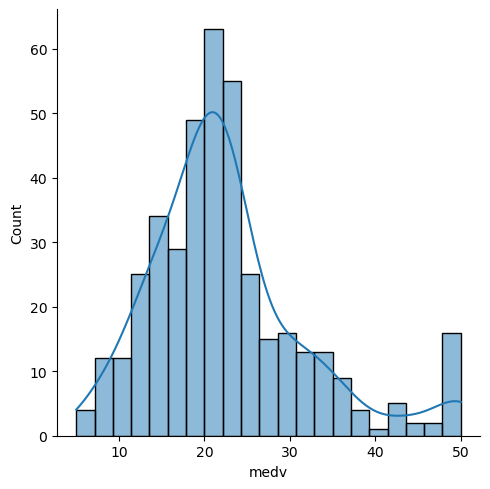

1.5244480329672944e-16


In [6]:
# Check for skewness
# Apply feature engineering on the training dataset to avoid data leakage (treat the test set as unseen data)

# plot a histogram showing the distribution of the target values
sns.displot(y_train, kde=True)
plt.show()

# statistical test
# p-value >= 0.05 means that the distribution is a normal distribution
from scipy import stats
_, p = stats.normaltest(y_train)
print(p)

0.13691571809545577


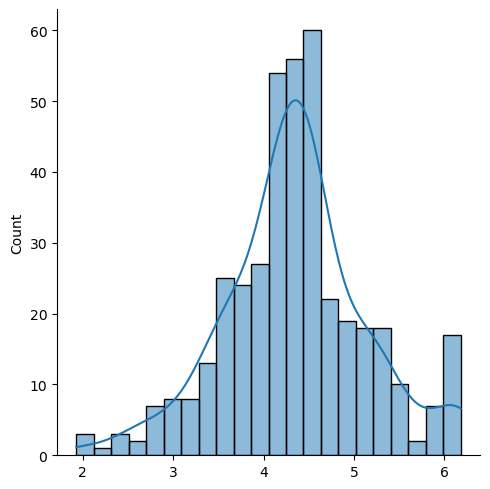

In [7]:
# y - transformation (box cox)
from scipy.stats import boxcox
y_train_bc, lambda_bc = boxcox(y_train)
_, p = stats.normaltest(y_train_bc)
print(p)
sns.displot(y_train_bc, kde=True)

# apply box cox on validation and testing
y_val_bc = boxcox(y_val, lambda_bc)
y_test_bc = boxcox(y_test, lambda_bc)

### Feature selection: Correlation matrix

<Axes: >

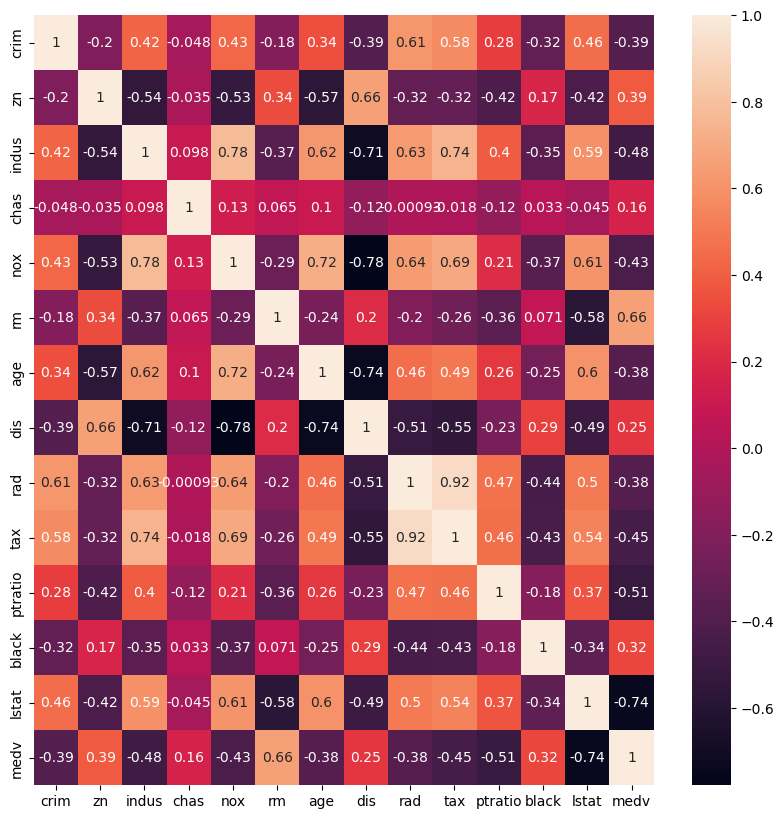

In [8]:
# compute the pair wise correlation for all columns  
correlation_matrix = pd.concat([X_train, y_train], axis=1).corr()
# use the heatmap function from seaborn to plot the correlation matrix
# Manipulate figsize in inches for 
fig, ax = plt.subplots(figsize=(10,10))
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

**Observations**
- From the above coorelation plot we can see that **medv** is strongly correlated to **lstat**, **rm**
- **rad** and **tax** are stronly correlated, so we don't include this in our features together to avoid multi-colinearity

### Feature selection: Importances

Feature ranking:
1. feature 12 (0.562950)
2. feature 5 (0.172050)
3. feature 0 (0.101548)
4. feature 7 (0.062867)
5. feature 4 (0.034609)
6. feature 10 (0.027611)
7. feature 9 (0.012222)
8. feature 11 (0.010539)
9. feature 6 (0.010116)
10. feature 8 (0.003187)
11. feature 2 (0.001832)
12. feature 3 (0.000308)
13. feature 1 (0.000159)


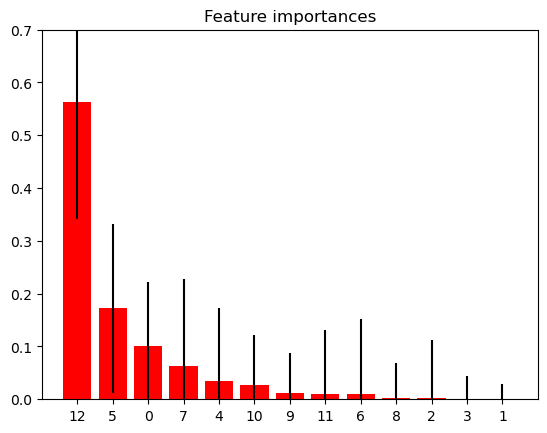

In [9]:
# Feature Importance using ExtraTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
# Build an estimator (forest of trees) and compute the feature importances
estimator = GradientBoostingRegressor(n_estimators=100, random_state=0)

estimator.fit(X_train, y_train_bc)
# Lets get the feature importances. 
# Features with high importance score higher.
importances = estimator.feature_importances_

std = np.std([tree[0].feature_importances_ for tree in estimator.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.ylim([0, 0.7])
plt.show()

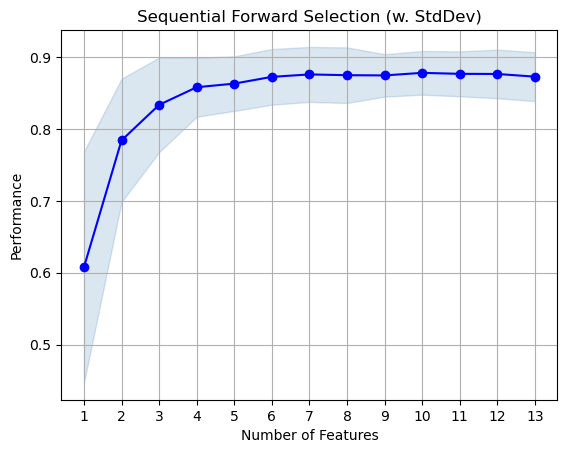

Selected features: (0, 3, 4, 5, 6, 7, 8, 9, 10, 12)
Prediction (CV) score: 0.8780676170916564


In [10]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

sfs = SFS(estimator, 
          k_features=(2,13), 
          forward=True, 
          floating=False, 
          scoring='r2',
          cv=10)

sfs = sfs.fit(X_train, y_train_bc)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()
print('Selected features:',sfs.k_feature_idx_)
print('Prediction (CV) score:',sfs.k_score_)

In [11]:
# for simplicity and educational purposes we choose only two features
X_train = X_train[['lstat', 'rm']]
X_val = X_val[['lstat', 'rm']]
X_test = X_test[['lstat', 'rm']]

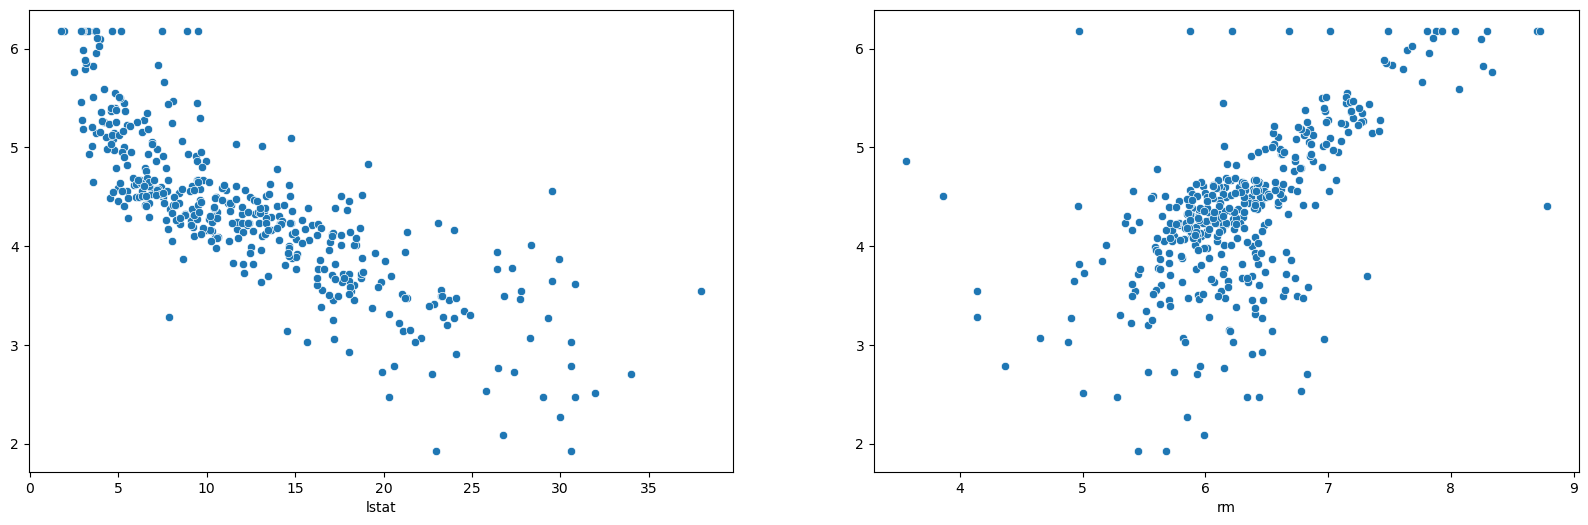

In [12]:
plt.figure(1,figsize=(20,6))
plt.subplot(121)
sns.scatterplot(x = X_train['lstat'], y = y_train_bc)
plt.subplot(122)
sns.scatterplot(x = X_train['rm'], y = y_train_bc)
plt.show()

## Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# linear regression with data transformations

lr1 = LinearRegression()

# model training
lin_model1 = lr1.fit(X_train, y_train)

# model evaluation for validation set
y_val_predict = lin_model1.predict(X_val)

# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_val, y_val_predict)))

# r-squared score of the model
r2 = r2_score(y_val, y_val_predict)

print("Model performance on validation dataset")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

Model performance on validation dataset
--------------------------------------
RMSE is 5.203457199881524
R2 score is 0.631266105649837


In [14]:
# linear regrassion on transformed data (unskewed target variable)

lr2 = LinearRegression()

# model training
lin_model2 = lr2.fit(X_train, y_train_bc)

# model evaluation for validation set
y_val_predict = lin_model2.predict(X_val)

# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_val_bc, y_val_predict)))

# r-squared score of the model
r2 = r2_score(y_val_bc, y_val_predict)

print("Model performance on validation dataset")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

Model performance on validation dataset
--------------------------------------
RMSE is 0.48604122195219784
R2 score is 0.5785638838720097


In [15]:
from scipy.special import inv_boxcox
# Model predictions are in the Box-Cox scale 
# We can transform predicted y values back to the original scale
# using the inverse Box Cox transformation
y_val_predict_orig = inv_boxcox(y_val_predict, lambda_bc)
# we evaluate RMSE 
rmse_orig = (np.sqrt(mean_squared_error(y_val, y_val_predict_orig)))
r2_orig = r2_score(y_val, y_val_predict_orig)
print("The model performance for validation set (initial data scale)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_orig))
print('R2 score is {}'.format(r2_orig))

The model performance for validation set (initial data scale)
--------------------------------------
RMSE is 4.770472127125568
R2 score is 0.6900784237549225


**Hyperparameter tuning**

In [16]:
lr3 = LinearRegression(fit_intercept=False)

# model training
lin_model3 = lr3.fit(X_train, y_train_bc)

# model evaluation for validation set
y_val_predict = lin_model3.predict(X_val)

y_val_predict_orig = inv_boxcox(y_val_predict, lambda_bc)
rmse_orig = (np.sqrt(mean_squared_error(y_val, y_val_predict_orig)))
r2_orig = r2_score(y_val, y_val_predict_orig)

print("Model performance on validation dataset (without intercept term)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_orig))
print('R2 score is {}'.format(r2_orig))

Model performance on validation dataset (without intercept term)
--------------------------------------
RMSE is 3.8402695055646077
R2 score is 0.7991589449167994


We can see that **lstat** doesn't vary exactly in a linear way. Let's apply the Polynomial Regression with **degree 2** and test.
To generate the higher order degrees, we use PolyniomialFeatures class from sklearn library.

## Polynomial Regression

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

poly_features = PolynomialFeatures(degree=2)
  
# transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
print(X_train[0:5])
print(X_train_poly[0:5])
  
# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_bc)
  
# transform validation set features to higher degree features
X_val_poly = poly_features.fit_transform(X_val)

# predicting on validation dataset
y_val_predict = poly_model.predict(X_val_poly)
  
# evaluating the model on validation dataset
rmse_val = np.sqrt(mean_squared_error(y_val_bc, y_val_predict))
r2_val = r2_score(y_val_bc, y_val_predict)
  
print("\nThe model performance for the validation set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_val))
print("R2 score of training set is {}".format(r2_val))

# revert to original scale
y_val_predict_orig = inv_boxcox(y_val_predict, lambda_bc)
  
# evaluating the model on validation dataset
rmse_val_orig = np.sqrt(mean_squared_error(y_val, y_val_predict_orig))
r2_val_orig = r2_score(y_val, y_val_predict_orig)
  
print("\nThe model performance for the validation set (original scale)")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_val_orig))
print("R2 score of training set is {}".format(r2_val_orig))

     lstat     rm
33   18.35  5.701
283   3.16  7.923
418  20.62  5.957
502   9.08  6.120
402  20.31  6.404
[[  1.        18.35       5.701    336.7225   104.61335   32.501401]
 [  1.         3.16       7.923      9.9856    25.03668   62.773929]
 [  1.        20.62       5.957    425.1844   122.83334   35.485849]
 [  1.         9.08       6.12      82.4464    55.5696    37.4544  ]
 [  1.        20.31       6.404    412.4961   130.06524   41.011216]]

The model performance for the validation set
-------------------------------------------
RMSE of training set is 0.42563876037425996
R2 score of training set is 0.6768025822754254

The model performance for the validation set (original scale)
-------------------------------------------
RMSE of training set is 4.177886288872826
R2 score of training set is 0.7622928102676387


**We can observe that the RMSE error is lower (thus better) when using polynomial regression as compared to linear regression with default hyperparameters but higher (thus worse) when compared to linear regression with fit_intercept=False.**

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# split dataset to train/test 80% / 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5, train_size = 0.8)

# Define pipeline involving PolynomialFeatures and LinearRegression steps
pf = PolynomialFeatures()
lr = LinearRegression()

# name each step
pipe = Pipeline(steps=[("poly", pf), ("linear", lr)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = [
    { "poly__degree": [1, 2, 3, 4, 5], "poly__interaction_only": [True, False], "poly__include_bias": [True, False] },
    { "poly__degree": [1, 2, 3, 4], "poly__interaction_only": [True, False], "poly__include_bias": [True, False], "linear__fit_intercept": [True, False] }
]
# make grid object for GridSearchCV and fit the dataset
search = GridSearchCV(pipe, param_grid, scoring = 'r2', cv=10, n_jobs=-1)
search.fit(X_train, y_train)

# print results
print(" Results from Grid Search " ) 
print("\n The best estimator across ALL searched params:\n", search.best_estimator_) 
print("\n The best score across ALL searched params:\n", search.best_score_) 
print("\n The best parameters across ALL searched params:\n", search.best_params_)

# Evaluate on the test set
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

# r-squared score of the model
r2 = r2_score(y_test, y_pred)

print("\nModel performance on testing dataset")
print("------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

 Results from Grid Search 

 The best estimator across ALL searched params:
 Pipeline(steps=[('poly', PolynomialFeatures(interaction_only=True)),
                ('linear', LinearRegression(fit_intercept=False))])

 The best score across ALL searched params:
 0.8239040045809777

 The best parameters across ALL searched params:
 {'linear__fit_intercept': False, 'poly__degree': 2, 'poly__include_bias': True, 'poly__interaction_only': True}

Model performance on testing dataset
------------------------------------
RMSE is 3.220157338361434
R2 score is 0.8675577863835


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer

pipeline1 = Pipeline([
    ('freq_imputer', SimpleImputer(strategy='most_frequent'))
])

pipeline2 = Pipeline([
    ('mean_imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler())
])

preprocessing_pipeline = ColumnTransformer(transformers=[
    ('pipeline1', pipeline1, ['chas', 'rad']),
    ('pipeline2', pipeline2, ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'ptratio', 'black', 'lstat'])],
    # set remainder to passthrough to pass along all the un-specified columns untouched to the next steps
    remainder='passthrough'
)

training_pipeline = Pipeline([
    ('poly', PolynomialFeatures()), 
    ('linear', TransformedTargetRegressor(
        regressor=LinearRegression(),
        transformer=PowerTransformer(method='yeo-johnson')
    ))
])

# Pipelines can be attached to one another!
pipe = Pipeline(steps= [("preprocessing", preprocessing_pipeline), ("training", training_pipeline)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
parameter_grid = [
    { "training__poly__degree": [1, 2, 3, 4, 5], "training__poly__interaction_only": [True, False], "training__poly__include_bias": [True, False] },
    { "training__poly__degree": [1, 2, 3, 4], "training__poly__interaction_only": [True, False], "training__poly__include_bias": [True, False], "training__linear__regressor__fit_intercept": [True, False] }
]
# make grid object for GridSearchCV and fit the dataset
search = GridSearchCV(pipe, parameter_grid, scoring = 'r2', cv=10, n_jobs=-1)
search.fit(X_train, y_train)

# print results
print(" Results from Grid Search " ) 
print("\n The best estimator across ALL searched params:\n", search.best_estimator_) 
print("\n The best score across ALL searched params:\n", search.best_score_) 
print("\n The best parameters across ALL searched params:\n", search.best_params_)

# Evaluate on the test set
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

# r-squared score of the model
r2 = r2_score(y_test, y_pred)

print("\nModel performance on testing dataset")
print("------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

 Results from Grid Search 

 The best estimator across ALL searched params:
 Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline1',
                                                  Pipeline(steps=[('freq_imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['chas', 'rad']),
                                                 ('pipeline2',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['crim', 'zn', 'indus', 'nox',
                           

## Support Vector Regression (SVR)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR

# Define a pipeline involving Robust Scaler and SVR
pipe_svr = Pipeline(steps=[
        ("scaler", RobustScaler()), 
        ("svr", TransformedTargetRegressor(regressor=SVR(), transformer=PowerTransformer(method='yeo-johnson')))
])

# parameter grid (as described in previous slide)
parameter_grid = [
 {'svr__regressor__C': [1, 10, 100, 1000], 'svr__regressor__kernel': ['linear']}, 
 {'svr__regressor__C': [1, 10, 100, 1000], 'svr__regressor__gamma': [0.001, 0.0001], 'svr__regressor__kernel': ['rbf']},
 {'svr__regressor__C': [1, 10, 100, 1000], 'svr__regressor__degree': [1, 2, 3, 4, 5, 6], 'svr__regressor__kernel': ['poly']}
] 
    
# make grid_SVC object for GridSearchCV and fit the dataset
grid_SVR = GridSearchCV(estimator=pipe_svr, param_grid = parameter_grid, scoring = 'r2', n_jobs=-1) 
grid_SVR.fit(X_train, y_train)
# print results
print(" Results from Grid Search " ) 
print("\n The best estimator across ALL searched params:\n", grid_SVR.best_estimator_) 
print("\n The best score across ALL searched params:\n", grid_SVR.best_score_) 

# Evaluate on the test set
best_model = grid_SVR.best_estimator_
y_pred = best_model.predict(X_test)

# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

# r-squared score of the model
r2 = r2_score(y_test, y_pred)

print("\nModel performance on testing dataset")
print("------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

 Results from Grid Search 

 The best estimator across ALL searched params:
 Pipeline(steps=[('scaler', RobustScaler()),
                ('svr',
                 TransformedTargetRegressor(regressor=SVR(C=1000, gamma=0.001),
                                            transformer=PowerTransformer()))])

 The best score across ALL searched params:
 0.8011969558251932

Model performance on testing dataset
------------------------------------
RMSE is 2.9887655163221054
R2 score is 0.8859078053060818


## Random Forest Regression

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
parameter_grid = {'rf__regressor__n_estimators': n_estimators,
               'rf__regressor__max_features': max_features,
               'rf__regressor__max_depth': max_depth,
               'rf__regressor__min_samples_split': min_samples_split,
               'rf__regressor__min_samples_leaf': min_samples_leaf,
               'rf__regressor__bootstrap': bootstrap}

# Pipelines can be attached to one another!
pipe = Pipeline([
    ("rf", TransformedTargetRegressor(regressor=RandomForestRegressor(), transformer=PowerTransformer(method='yeo-johnson')))
])
    
# make grid_RF object for GridSearchCV and fit the dataset
grid_RF = GridSearchCV(estimator=pipe, param_grid = parameter_grid, scoring = 'r2', n_jobs=-1) 
grid_RF.fit(X_train, y_train)

# print results
print(" Results from Grid Search " ) 
print("\n The best estimator across ALL searched params:\n", grid_RF.best_estimator_) 
print("\n The best score across ALL searched params:\n", grid_RF.best_score_) 
print("\n The best parameters across ALL searched params:\n", grid_RF.best_params_)

# Evaluate on the test set
best_model = grid_RF.best_estimator_
y_pred = best_model.predict(X_test)

# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

# r-squared score of the model
r2 = r2_score(y_test, y_pred)

print("\nModel performance on testing dataset")
print("------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

 Results from Grid Search 

 The best estimator across ALL searched params:
 Pipeline(steps=[('rf',
                 TransformedTargetRegressor(regressor=RandomForestRegressor(bootstrap=False,
                                                                            max_depth=60,
                                                                            max_features='sqrt',
                                                                            n_estimators=377),
                                            transformer=PowerTransformer()))])

 The best score across ALL searched params:
 0.8803804209933632

 The best parameters across ALL searched params:
 {'rf__regressor__bootstrap': False, 'rf__regressor__max_depth': 60, 'rf__regressor__max_features': 'sqrt', 'rf__regressor__min_samples_leaf': 1, 'rf__regressor__min_samples_split': 2, 'rf__regressor__n_estimators': 377}

Model performance on testing dataset
------------------------------------
RMSE is 2.8937476393967922
R2 score